In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
# data preparation
"""make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, 
n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, 
scale=1.0, shuffle=True, random_state=None)"""
classes_data = datasets.make_classification(n_samples=400, n_features=50, n_informative=12, n_redundant=10, 
                                       n_classes=2, random_state=1, shuffle=True)
colors = ListedColormap(['red', 'blue'])
#plt.figure(figsize=(8, 8))
#plt.scatter([x[0] for x in classes_data[0]], [x[1] for x in classes_data[0]], c=classes_data[1], cmap=colors)
X, y = classes_data[0], classes_data[1]

# train & test subdivision
train_proportion = 0.7
train_test_cut = int(len(classes_data[0]) * train_proportion)
X_train, X_test, y_train, y_test = \
    X[:train_test_cut], \
    X[train_test_cut:], \
    y[:train_test_cut], \
    y[train_test_cut:]
print("Train features - ", X_train.shape)
print("Test features - ", X_test.shape)
print("Train responses", y_train.shape)
print("Test responses", y_test.shape)

Train features -  (280, 50)
Test features -  (120, 50)
Train responses (280,)
Test responses (120,)


In [3]:
X_train = X_train.transpose()
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.transpose()
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
print("Train features - ", X_train.shape)
print("Test features - ", X_test.shape)
print("Train responses", y_train.shape)
print("Test responses", y_test.shape)

Train features -  (50, 280)
Test features -  (50, 120)
Train responses (1, 280)
Test responses (1, 120)


In [5]:
# initial weights
w0 = np.zeros((X_train.shape[0], 1))

## Урок 3. Логистическая регрессия. Log Loss
1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.* 
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.* 

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

Good article about optimiztion of logloss:
https://habr.com/ru/post/485872/

In [7]:
def calc_logloss(w, X, y):    
    X_size = X.shape[1]
    prob = sigmoid(np.dot(w.T, X)) # class 1 probability
    #loss = -1.0 / X_size * np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob)) # classes 0 and 1
    loss = 1.0 / X_size * np.sum(np.log(1 + np.exp(-y * np.dot(w.T, X)))) # classes -1 and 1
    #grad = 1.0 / X_size * np.dot(X, (np.dot(w.T, X) - y).T) # classes 0 and 1
    grad = 1.0 / X_size * np.dot(X, (prob - y).T) # classes -1 and 1
    return loss, grad

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

article:
    https://dyakonov.org/2018/03/12/%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F-%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8/

Best alpha value - 0.175


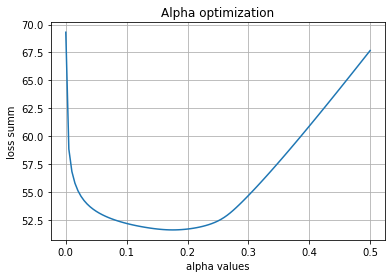

In [8]:
def eval_model(w, X, y, n_iterations, alpha_):
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = calc_logloss(w, X, y)
        w = w - alpha_ * grad
        losses.append(loss)
    return w, losses

iterations = 100
alpha_arr = np.array([])
losses_arr = np.array([])
for i in range(101):
    alpha_ = 0.05 * i/10
    alpha_arr = np.append(alpha_arr, alpha_)
    w, losses = eval_model(w0, X_train, y_train, iterations, alpha_)
    losses_arr = np.append(losses_arr, np.sum(np.absolute(losses)))

alpha_ = alpha_arr[np.argmin(losses_arr)]
print(f'Best alpha value - {alpha_}')
plt.title('Alpha optimization')
plt.xlabel('alpha values')
plt.ylabel('loss summ')
plt.plot(alpha_arr, losses_arr)
plt.grid(True)

Best number of iterations - 480


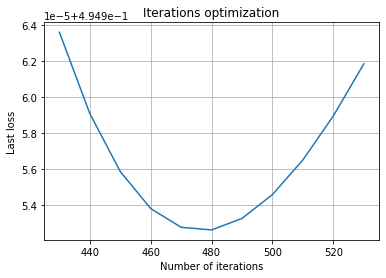

In [9]:
iterations_arr = np.array([])
#alpha_ = alpha_arr[np.argmin(losses_arr)] #0.175
#alpha_ = 0.175
losses_arr = np.array([])
for i in range(11):
    iterations = 430 + 10*i
    iterations_arr = np.append(iterations_arr, iterations)
    w, losses = eval_model(w0, X_train, y_train, iterations, alpha_)
    losses_arr = np.append(losses_arr, losses[-1])
    
plt.title('Iterations optimization')
plt.xlabel('Number of iterations')
plt.ylabel('Last loss')
plt.plot(iterations_arr, losses_arr)
plt.grid(True)
n_iterations = round(iterations_arr[np.argmin(losses_arr)])
print(f'Best number of iterations - {n_iterations}')

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [10]:
def calc_pred_proba(X, W):
    y_pred_proba = sigmoid(np.dot(W.T,X))
    return y_pred_proba


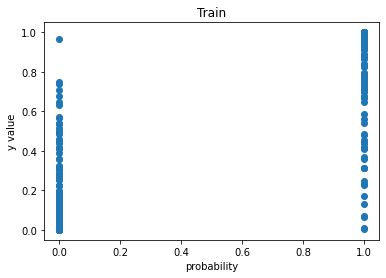

In [11]:
w, losses = eval_model(w0, X_train, y_train, n_iterations, alpha_)
plt.title('Train')
plt.xlabel('probability')
plt.ylabel('y value')
plt.scatter(y_train.T, calc_pred_proba(X_train,w).T)

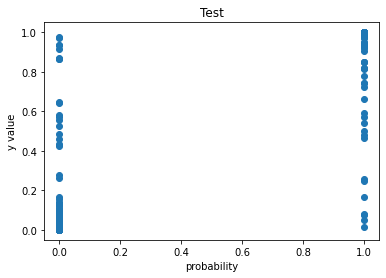

In [12]:
plt.title('Test')
plt.xlabel('probability')
plt.ylabel('y value')
plt.scatter(y_test.T, calc_pred_proba(X_test,w).T)

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [13]:
def calc_pred(X, W):
    X_size = X.shape[1]
    y_pred = np.zeros((1, X_size))
    W = W.reshape(X.shape[0], 1)
    prob = calc_pred_proba(X, w)
    for i in range(prob.shape[1]):
        if (prob[:,i] > 0.5): 
            y_pred[:, i] = 1
        elif (prob[:,i] <= 0.5):
            y_pred[:, i] = 0
    return y_pred

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [14]:
class Metrics:
    import numpy as np

    def __init__(self, y_real = [], y_pred = []):
        self.y_real = np.array(y_real)
        self.y_pred = np.array(y_pred)
        
    def true_positive(self):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            tp = np.sum(self.y_real * self.y_pred)
        else:
            tp = 0
        return tp
    
    def true_negative(self):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            y_real = self.y_real
            y_pred = self.y_pred
            tn = np.sum(np.absolute(self.y_real - 1) * np.absolute(self.y_pred - 1))
        else:
            tn = 0
        return tn
    
    def false_positive(self):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            fp = np.sum(np.absolute(self.y_real - 1) * self.y_pred)
        else:
            fp = 0
        return fp
    
    def false_negative(self):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            fn = np.sum(self.y_real * np.absolute(self.y_pred - 1))
        else:
            fn = 0
        return fn
    
    def precision(self):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            prec = self.true_positive()/(self.true_positive() + self.false_positive())
        else:
            prec = 0
        return prec
                   
    def recall(self):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            acc = self.true_positive()/(self.true_positive() + self.false_negative())
        else:
            acc = 0
        return acc
                   
    def accuracy(self):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            acc = (self.true_positive() + self.true_negative())/len(self.y_real)
        else:
            acc = 0
        return acc
    
    def err_matrix(self):
        return[[self.true_positive(), self.false_positive()],[self.false_negative(), self.true_negative()]]
                   
    def f_score(self, betta = 1):
        if (self.y_real.size > 0) and (self.y_pred.size > 0):
            f = (1 + betta**2)*self.precision()*self.recall()/(betta**2 * self.precision() + self.recall())
        else:
            f = 0
        return f

In [15]:
y_pred = calc_pred(X_train, w)
calc_metrics = Metrics(y_train.T, y_pred.T)
print(f'Train\n Accuracy - {calc_metrics.accuracy()},\n матрица ошибок - {calc_metrics.err_matrix()},\n точность - {calc_metrics.precision()},\n полнота - {calc_metrics.recall()}, \nF1 score - {calc_metrics.f_score()}')

Train
 Accuracy - 0.875,
 матрица ошибок - [[127.0, 13.0], [22.0, 118.0]],
 точность - 0.9071428571428571,
 полнота - 0.8523489932885906, 
F1 score - 0.8788927335640139


In [16]:
y_pred = calc_pred(X_test, w)
calc_metrics = Metrics(y_test.T, y_pred.T)
print(f'Test\n Accuracy - {calc_metrics.accuracy()},\n матрица ошибок - {calc_metrics.err_matrix()},\n точность - {calc_metrics.precision()},\n полнота - {calc_metrics.recall()},\n F1 score - {calc_metrics.f_score()}')

Test
 Accuracy - 0.8083333333333333,
 матрица ошибок - [[43.0, 14.0], [9.0, 54.0]],
 точность - 0.7543859649122807,
 полнота - 0.8269230769230769,
 F1 score - 0.7889908256880734


### 6. Могла ли модель переобучиться? Почему?

Судя по f1 score модель не переобучилась, но могла бы, если бы количество итераций было больше, так как накопились бы ошибки.

### 7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.* 